### Image Gradients
#### 목표
이 장에서는 다음을 배웁니다.

* 이미지 그라디언트, 가장자리 찾기 등
* 우리는 다음과 같은 함수를 볼 것입니다 : **cv2.Sobel () , cv2.Scharr () , cv2.Laplacian ()** 등등

####  Theory
OpenCV는 **Sobel, Scharr 및 Laplacian**의 세 가지 유형의 그래디언트 필터 또는 하이 패스 필터를 제공합니다. 우리는 그들 각각을 볼 것입니다.

##### 1 Sobel and Scharr Derivatives

소벨 (Sobel) 연산자는 Gaussian 평활화 + 미분 연산이므로 더 노이즈에 강합니다. 취할 파생 방향, 수직 또는 수평 방향 ( 각각 yorder 및 xorder 인수)을 지정할 수 있습니다 . ksize 인수로 커널의 크기를 지정할 수도 있습니다 . ksize = -1 인 경우 3x3 Scharr 필터가 사용되어 3x3 소벨 필터보다 우수한 결과를 제공합니다. 사용 된 커널에 대한 문서를 참조하십시오.\

##### Laplacian Derivatives
관계식에 의해 주어진 이미지의 라플라시안을 계산합니다. ![](5-1.png)여기서 각 파생어는 소벨 파생 상품을 사용하여 찾습니다. 경우 ksize = 1 , 다음 다음 커널은 필터링을 위해 사용된다 :

커널 = \ begin {bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \ end {bmatrix}![](5-2.png)

It calculates the Laplacian of the image given by the relation, ![](5-1.png) where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

![](5-2.png)

#### Code
아래의 코드는 모든 다이어그램의 연산자를 보여줍니다. 모든 커널은 5x5 크기입니다. np.uint8 유형으로 결과를 얻으려면 출력 이미지의 깊이가 -1로 전달됩니다.

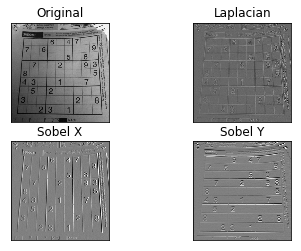

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
img = cv2.imread('sudoku-original.jpg',0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

#### One Importan Matter!

마지막 예제에서 출력 데이터 유형은 cv2.CV_8U 또는 np.uint8입니다. 하지만 약간의 문제가 있습니다. 화이트 투 블랙 (Black / White) 전환은 네거티브 (Negative) 슬로프 (Negative Slope)로 간주되는 반면 블랙 / 화이트 전환은 포지티브 슬로프 (Positive Slope)로 간주됩니다. 따라서 데이터를 np.uint8로 변환하면 모든 음의 기울기가 0이됩니다. 간단히 말해서, 당신은 그 가장자리를 놓치고 있습니다.

두 모서리를 모두 감지하려면 출력 데이터 유형을 cv2.CV_16S, cv2.CV_64F 등의 상위 형식으로 유지하고 절대 값을 취한 다음 다시 cv2.CV_8U로 변환하십시오. 아래 코드는 수평 소벨 필터와 결과의 차이에 대한이 절차를 보여줍니다.

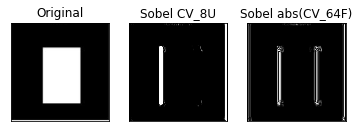

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('box.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img ,cv2.CV_64F, 1, 0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()